# Results and Analysis Section

In [1]:
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import uproot
import cvxpy as cp
import random
sns.set_theme()

In [33]:
from AnalyzeDrift_Class import AnalyzeDrift

In [34]:
ad = AnalyzeDrift("all_events.csv")

C:\Users\clair\HF\Jupyter_Notebooks\SuperNEMO\MSc_Dissertation\AnalyzeDrift_Class.py:410: RuntimeWarning: invalid value encountered in double_scalars
  rad = (self.drift_times[n] / a)**(1 / (1 - b))  # calculates the


In [35]:
ad.drift_df.head()

,Event,ID,Side,Layer,Column,R0,Calo_time,Rising_cell_time,Drift_time,Cell_type,Drift_radius
0,0,0,1,0,7,847289447.0,1.694578e+09,82928.0,4.017214,edge_in,0.683123
1,0,1,1,8,0,847289127.0,1.694578e+09,82928.0,0.017214,corner_in,0.037672
2,0,2,1,5,3,847289197.0,1.694578e+09,82928.0,0.892214,center_in,0.304760
3,0,3,1,6,2,847289122.0,1.694578e+09,82928.0,-0.045286,center_in,NaN
4,0,4,1,1,7,847289281.0,1.694578e+09,82928.0,1.942214,center_in,0.458947


## Time and Radius Distributions

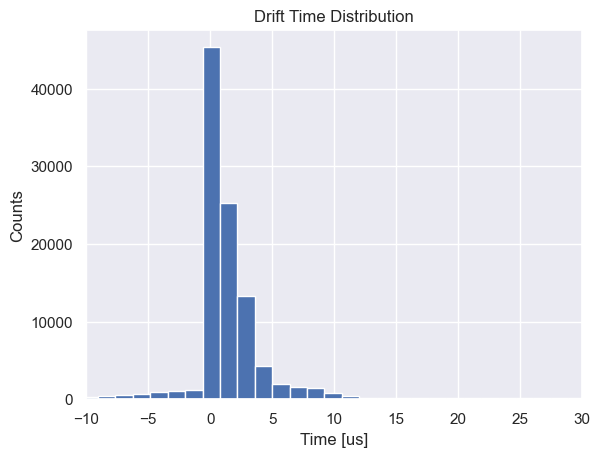

In [5]:
plt.figure()
plt.hist([x for x in ad.drift_df['Drift_time'] if x > -10000], bins=300)
plt.xlim([-10, 30])
plt.xlabel('Time [us]')
plt.ylabel('Counts')
plt.title('Drift Time Distribution')
plt.show()

In [6]:
outlier_df = ad.drift_df[ad.drift_df['Drift_time'] > 40]
outlier_df.head(50)

,Event,ID,Side,Layer,Column,R0,Calo_time,Rising_cell_time,Drift_time,Cell_type,Drift_radius
50,4,1,1,6,33,851630959.0,1.703254e+09,83134.0,48.898149,center_out,2.313080
58,4,9,1,7,70,851633172.0,1.703254e+09,83134.0,76.560649,center_out,2.695539
70,5,5,0,1,3,851752885.0,1.703497e+09,139034.0,55.725354,center_out,2.418593
76,5,11,0,6,62,851753150.0,1.703497e+09,139034.0,59.037854,center_out,2.466730
129,10,6,0,2,48,854120675.0,1.708235e+09,252986.0,42.457729,center_out,2.204230
168,13,1,1,4,17,856097409.0,1.712186e+09,80802.0,53.720458,center_out,2.388535
174,13,7,1,5,38,856097315.0,1.712186e+09,80802.0,52.545458,center_out,2.370575
189,15,6,1,3,48,857505484.0,1.715003e+09,85168.0,51.445046,center_out,2.353513
228,19,9,0,7,66,859688352.0,1.719365e+09,253395.0,73.263355,center_out,2.655342
243,21,4,1,0,5,860866594.0,1.721723e+09,253264.0,63.482305,edge_out,2.597047


In [7]:
ad.dead_cells

[(0, 1, 1),
 (0, 2, 1),
 (0, 3, 0),
 (0, 4, 3),
 (0, 9, 0),
 (0, 11, 0),
 (0, 21, 0),
 (0, 56, 3),
 (0, 56, 4),
 (0, 56, 5),
 (0, 57, 0),
 (0, 63, 8),
 (0, 70, 0),
 (0, 74, 4),
 (0, 77, 8),
 (0, 84, 0),
 (0, 86, 8),
 (0, 87, 0),
 (0, 89, 1),
 (0, 101, 3),
 (1, 32, 0),
 (1, 47, 8),
 (1, 56, 4),
 (1, 56, 5),
 (1, 73, 2),
 (1, 79, 6),
 (1, 80, 2),
 (1, 84, 5),
 (1, 91, 2),
 (1, 99, 8),
 (1, 100, 4),
 (1, 107, 8),
 (1, 110, 0)]

- negative drift times?
- correlation between cells and negative times?
- outlier long times -- why?
- same cells give negative times in different dataset?

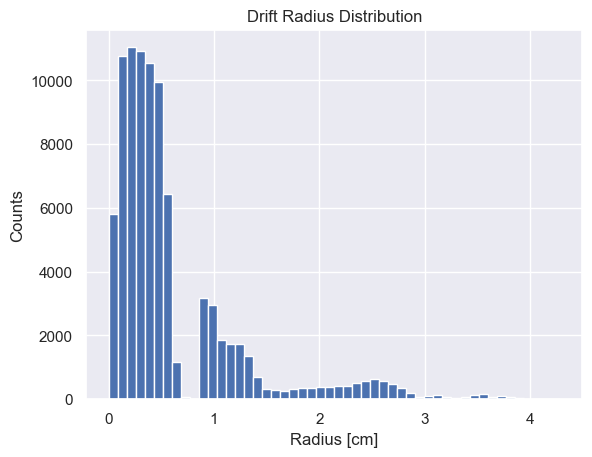

In [8]:
plt.figure()
plt.hist(ad.drift_df['Drift_radius'], bins=50)
plt.xlabel('Radius [cm]')
plt.ylabel('Counts')
plt.title('Drift Radius Distribution')
plt.show()

In [9]:
max(ad.drift_df['Drift_radius'])

4.282676635308592

## Inner vs. Outer Plots

In [10]:
inner = np.ma.make_mask([a.item() for a in np.logical_or(np.logical_or([ad.drift_df['Cell_type'] == 'center_in'], 
                                                                       [ad.drift_df['Cell_type'] == 'edge_in']).T,
                                                         np.array([ad.drift_df['Cell_type'] == 'corner_in']).T)])
outer = np.ma.make_mask([a.item() for a in np.logical_or(np.logical_or([ad.drift_df['Cell_type'] == 'center_out'], 
                                                                       [ad.drift_df['Cell_type'] == 'edge_out']).T,
                                                         np.array([ad.drift_df['Cell_type'] == 'corner_out']).T)])

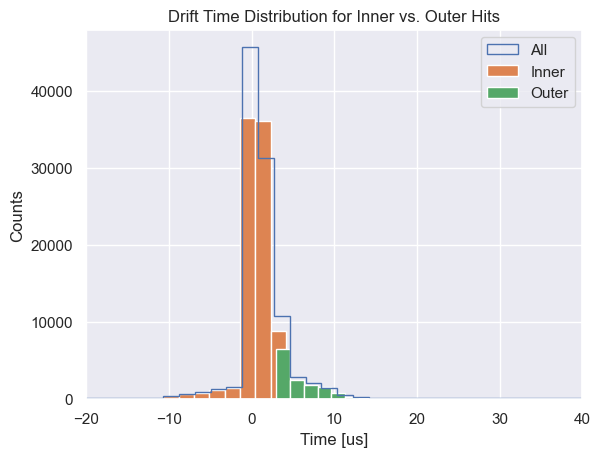

In [11]:
plt.figure()
plt.hist([x for x in ad.drift_df['Drift_time'] if x>-10000], bins=220, histtype='step')
plt.hist([x for x in ad.drift_df['Drift_time'][inner] if x > -10000], 
         bins=70)
plt.hist([x for x in ad.drift_df['Drift_time'][outer] if x > -10000], 
         bins=175)
plt.xlim([-20, 40])
plt.xlabel('Time [us]')
plt.ylabel('Counts')
plt.title('Drift Time Distribution for Inner vs. Outer Hits')
plt.legend(['All', 'Inner', 'Outer'])
plt.show()

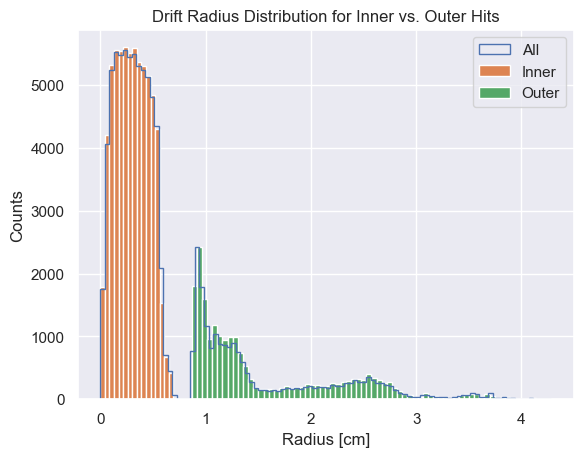

In [12]:
plt.figure()
plt.hist(ad.drift_df['Drift_radius'], bins=100, histtype='step')
plt.hist(ad.drift_df['Drift_radius'][inner], bins=16)
plt.hist(ad.drift_df['Drift_radius'][outer], bins=70)
plt.xlabel('Radius [cm]')
plt.ylabel('Counts')
plt.title('Drift Radius Distribution for Inner vs. Outer Hits')
plt.legend(['All', 'Inner', 'Outer'])
plt.show()

## Edge/Corner/Center Plots

In [13]:
subset_dts = [x for x in ad.drift_df['Drift_time'] if x > -10000]

In [14]:
center =  np.ma.make_mask([a.item() for a in np.logical_or([ad.drift_df['Cell_type'] == 'center_in'], 
                                                           [ad.drift_df['Cell_type'] == 'center_out']).T])
edge =  np.ma.make_mask([a.item() for a in np.logical_or([ad.drift_df['Cell_type'] == 'edge_in'], 
                                                         [ad.drift_df['Cell_type'] == 'edge_out']).T])
corner =  np.ma.make_mask([a.item() for a in np.logical_or([ad.drift_df['Cell_type'] == 'corner_in'], 
                                                           [ad.drift_df['Cell_type'] == 'corner_out']).T])

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


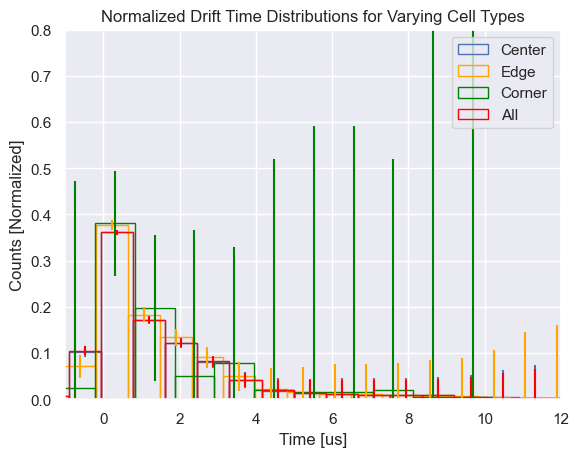

In [15]:
plt.figure()

ct_counts, ct_bins = np.histogram([x for x in ad.drift_df['Drift_time'][center] if x > -10000], bins=500)
ct_norm_counts, ct_norm_bins = np.histogram([x for x in ad.drift_df['Drift_time'][center] if x > -10000], bins=500, density=True)
e_counts, e_bins = np.histogram([x for x in ad.drift_df['Drift_time'][edge] if x > -10000], bins=500)
e_norm_counts, e_norm_bins = np.histogram([x for x in ad.drift_df['Drift_time'][edge] if x > -10000], bins=500, density=True)
cr_counts, cr_bins = np.histogram([x for x in ad.drift_df['Drift_time'][corner] if x > -10000], bins=200)
cr_norm_counts, cr_norm_bins = np.histogram([x for x in ad.drift_df['Drift_time'][corner] if x > -10000], bins=200, density=True)
all_counts, all_bins = np.histogram([x for x in ad.drift_df['Drift_time'] if x > -10000], bins=500)
all_norm_counts, all_norm_bins = np.histogram([x for x in ad.drift_df['Drift_time'] if x > -10000], bins=500, density=True)

ct_error_xs = []
ct_yerror = []
e_error_xs = []
e_yerror = []
cr_error_xs = []
cr_yerror = []
all_error_xs = []
all_yerror = []

for n in np.arange(len(ct_counts)):
    ct_error_xs.append(ct_bins[n] + (ct_bins[n+1] - ct_bins[n])/2)
    ct_yerror.append(np.sqrt(ct_counts[n])/ct_counts[n])
    e_error_xs.append(e_bins[n] + (e_bins[n+1] - e_bins[n])/2)
    e_yerror.append(np.sqrt(e_counts[n])/e_counts[n])
    all_error_xs.append(all_bins[n] + (all_bins[n+1] - all_bins[n])/2)
    all_yerror.append(np.sqrt(all_counts[n])/all_counts[n])

for n in np.arange(len(cr_counts)):
    cr_error_xs.append(cr_bins[n] + (cr_bins[n+1] - cr_bins[n])/2)
    cr_yerror.append(np.sqrt(cr_counts[n])/cr_counts[n])

plt.bar(ct_error_xs, ct_norm_counts, width=(ct_norm_bins[1] - ct_norm_bins[0]), yerr=ct_yerror, fill=False, edgecolor='b', ecolor='b')
plt.bar(e_error_xs, e_norm_counts, width=(e_norm_bins[1] - e_norm_bins[0]), yerr=e_yerror, fill=False, edgecolor='orange', ecolor='orange')
plt.bar(cr_error_xs, cr_norm_counts, width=(cr_norm_bins[1] - cr_norm_bins[0]), yerr=cr_yerror, fill=False, edgecolor='green', ecolor='green')
plt.bar(all_error_xs, all_norm_counts, width=(all_norm_bins[1] - all_norm_bins[0]), yerr=all_yerror, fill=False, edgecolor='red', ecolor='red')

plt.xlim([-1, 12])
plt.ylim([0, 0.8])
plt.xlabel("Time [us]")
plt.ylabel("Counts [Normalized]")
plt.title("Normalized Drift Time Distributions for Varying Cell Types")
plt.legend(['Center', 'Edge', 'Corner', 'All'])
plt.show()

In [16]:
(ct_bins[1] - ct_bins[0])

0.8426326144790721

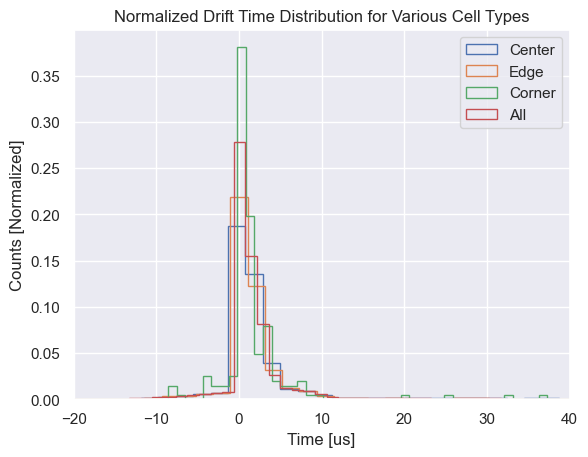

In [17]:
plt.figure()
center_hist = plt.hist([x for x in ad.drift_df['Drift_time'][center] if x > -10000], 
         bins=200, density=True, histtype='step')
plt.hist([x for x in ad.drift_df['Drift_time'][edge] if x > -10000], 
         bins=200, density=True, histtype='step')
plt.hist([x for x in ad.drift_df['Drift_time'][corner] if x > -10000], 
         bins=200, density=True, histtype='step')
plt.hist([x for x in ad.drift_df['Drift_time'] if x>-10000], bins=300, density=True, histtype='step')
plt.xlim([-20, 40])
plt.xlabel('Time [us]')
plt.ylabel('Counts [Normalized]')
plt.title('Normalized Drift Time Distribution for Various Cell Types')
plt.legend(['Center', 'Edge', 'Corner', 'All'])
plt.show()

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


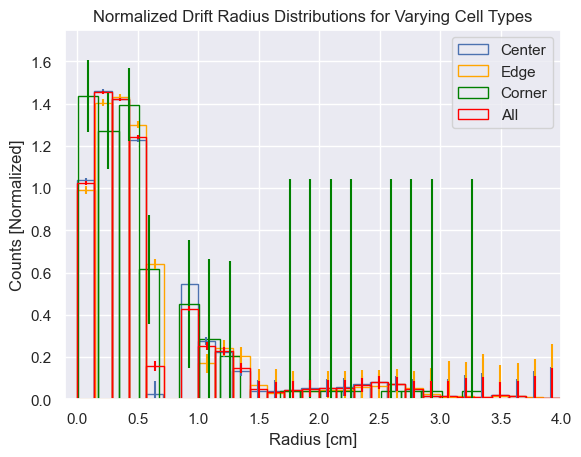

In [18]:
plt.figure()

ct_counts, ct_bins = np.histogram(ad.drift_df['Drift_radius'][center].dropna(), bins=30)
ct_norm_counts, ct_norm_bins = np.histogram(ad.drift_df['Drift_radius'][center].dropna(), bins=30, density=True)
e_counts, e_bins = np.histogram(ad.drift_df['Drift_radius'][edge].dropna(), bins=30)
e_norm_counts, e_norm_bins = np.histogram(ad.drift_df['Drift_radius'][edge].dropna(), bins=30, density=True)
cr_counts, cr_bins = np.histogram(ad.drift_df['Drift_radius'][corner].dropna(), bins=20)
cr_norm_counts, cr_norm_bins = np.histogram(ad.drift_df['Drift_radius'][corner].dropna(), bins=20, density=True)
all_counts, all_bins = np.histogram(ad.drift_df['Drift_radius'].dropna(), bins=30)
all_norm_counts, all_norm_bins = np.histogram(ad.drift_df['Drift_radius'].dropna(), bins=30, density=True)

ct_error_xs = []
ct_yerror = []
e_error_xs = []
e_yerror = []
cr_error_xs = []
cr_yerror = []
all_error_xs = []
all_yerror = []

for n in np.arange(len(ct_counts)):
    ct_error_xs.append(ct_bins[n] + (ct_bins[n+1] - ct_bins[n])/2)
    ct_yerror.append(np.sqrt(ct_counts[n])/ct_counts[n])
    e_error_xs.append(e_bins[n] + (e_bins[n+1] - e_bins[n])/2)
    e_yerror.append(np.sqrt(e_counts[n])/e_counts[n])
    all_error_xs.append(all_bins[n] + (all_bins[n+1] - all_bins[n])/2)
    all_yerror.append(np.sqrt(all_counts[n])/all_counts[n])

for n in np.arange(len(cr_counts)):
    cr_error_xs.append(cr_bins[n] + (cr_bins[n+1] - cr_bins[n])/2)
    cr_yerror.append(np.sqrt(cr_counts[n])/cr_counts[n])

plt.bar(ct_error_xs, ct_norm_counts, width=(ct_norm_bins[1] - ct_norm_bins[0]), yerr=ct_yerror, fill=False, edgecolor='b', ecolor='b')
plt.bar(e_error_xs, e_norm_counts, width=(e_norm_bins[1] - e_norm_bins[0]), yerr=e_yerror, fill=False, edgecolor='orange', ecolor='orange')
plt.bar(cr_error_xs, cr_norm_counts, width=(cr_norm_bins[1] - cr_norm_bins[0]), yerr=cr_yerror, fill=False, edgecolor='green', ecolor='green')
plt.bar(all_error_xs, all_norm_counts, width=(all_norm_bins[1] - all_norm_bins[0]), yerr=all_yerror, fill=False, edgecolor='red', ecolor='red')

plt.xlim([-0.1, 4])
plt.ylim([0, 1.75])
plt.xlabel("Radius [cm]")
plt.ylabel("Counts [Normalized]")
plt.title("Normalized Drift Radius Distributions for Varying Cell Types")
plt.legend(['Center', 'Edge', 'Corner', 'All'])
plt.show()

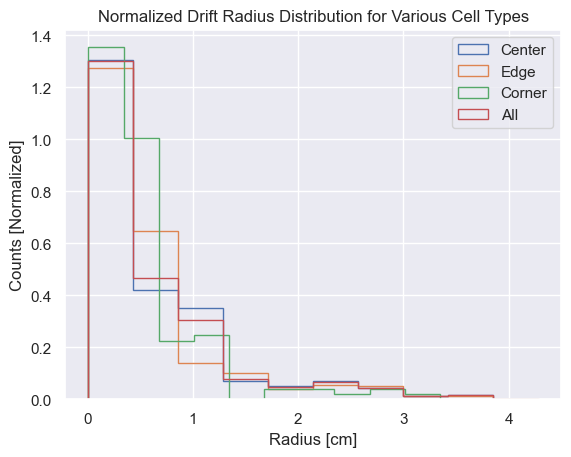

In [19]:
plt.figure()
plt.hist(ad.drift_df['Drift_radius'][center], 
         density=True, histtype='step')
plt.hist(ad.drift_df['Drift_radius'][edge], 
         density=True, histtype='step')
plt.hist(ad.drift_df['Drift_radius'][corner], 
         density=True, histtype='step')
plt.hist(ad.drift_df['Drift_radius'], density=True, histtype='step')
plt.xlabel('Radius [cm]')
plt.ylabel('Counts [Normalized]')
plt.title('Normalized Drift Radius Distribution for Various Cell Types')
plt.legend(['Center', 'Edge', 'Corner', 'All'])
plt.show()

## Dead Cell Selection

## CVXPY Methods

In [20]:
x_bounds = (-2.2, 2.2)
y_bounds = (-2.2, 2.2)
n_events = 12000

In [21]:
x1s = []
y1s = []
x2s = []
y2s = []

for n in np.arange(n_events):
    x1s.append(random.uniform(x_bounds[0], x_bounds[1]))
    y1s.append(random.uniform(y_bounds[0], y_bounds[1]))
    x2s.append(random.uniform(x_bounds[0], x_bounds[1]))
    y2s.append(random.uniform(y_bounds[0], y_bounds[1]))

In [22]:
def twopoints_to_r(x1, x2, y1, y2):
    x = cp.Variable(1)
    y = cp.Variable(1)
    m = cp.Parameter(value=(y2 - y1)/(x2 - x1))
    b = cp.Parameter(value=y1 - (y2 - y1)*x1/(x2 - x1))
    
    R2 = cp.power(x, 2) + cp.power(y, 2)
    
    constraints = {y == m*x + b}
    
    obj = cp.Minimize(R2)
    problem = cp.Problem(obj, constraints)
    problem.solve()
    
    X = x.value
    Y = y.value
    
    return X, Y

In [23]:
Rs = []

for n in np.arange(n_events):
    x,y = twopoints_to_r(x1s[n], x2s[n], y1s[n], y2s[n])
    r = np.sqrt(x.item()**2 + y.item()**2)
    
    
    Rs.append(r)

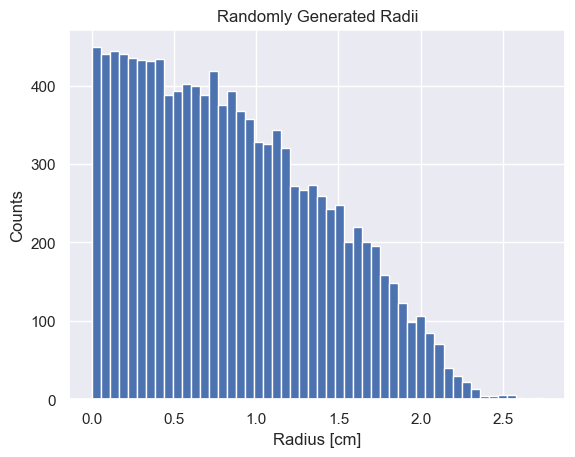

In [24]:
random = plt.figure()
plt.hist(Rs, bins=50)
plt.title("Randomly Generated Radii")
plt.ylabel("Counts")
plt.xlabel("Radius [cm]")
plt.show()

In [25]:
random.savefig('Random_distribution.png')

In [26]:
max(Rs)

2.74182267532742

## Random Generator vs. Real Data Distributions

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


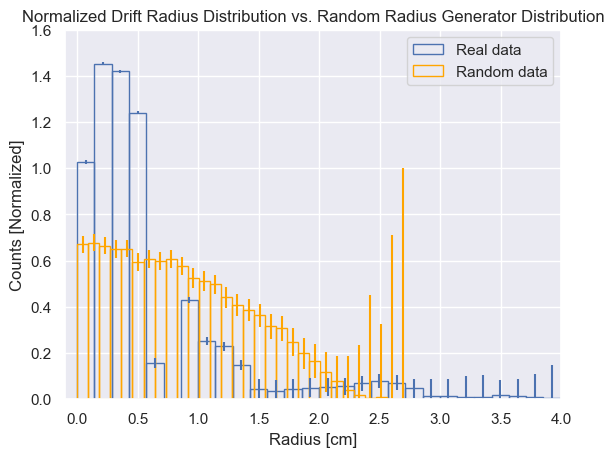

In [27]:
plt.figure()

r_counts, r_bins = np.histogram(Rs, bins=30)
r_norm_counts, r_norm_bins = np.histogram(Rs, bins=30, density=True)
all_counts, all_bins = np.histogram(ad.drift_df['Drift_radius'].dropna(), bins=30)
all_norm_counts, all_norm_bins = np.histogram(ad.drift_df['Drift_radius'].dropna(), bins=30, density=True)

r_error_xs = []
r_yerror = []
all_error_xs = []
all_yerror = []

for n in np.arange(len(ct_counts)):
    r_error_xs.append(r_bins[n] + (r_bins[n+1] - r_bins[n])/2)
    r_yerror.append(np.sqrt(r_counts[n])/r_counts[n])
    all_error_xs.append(all_bins[n] + (all_bins[n+1] - all_bins[n])/2)
    all_yerror.append(np.sqrt(all_counts[n])/all_counts[n])

plt.bar(all_error_xs, all_norm_counts, width=(all_norm_bins[1] - all_norm_bins[0]), yerr=all_yerror, fill=False, edgecolor='b', ecolor='b')
plt.bar(r_error_xs, r_norm_counts, width=(r_norm_bins[1] - r_norm_bins[0]), yerr=r_yerror, fill=False, edgecolor='orange', ecolor='orange')

plt.xlim([-0.1, 4])
plt.ylim([0, 1.6])
plt.xlabel("Radius [cm]")
plt.ylabel("Counts [Normalized]")
plt.title("Normalized Drift Radius Distribution vs. Random Radius Generator Distribution")
plt.legend(['Real data', 'Random data'])
plt.show()

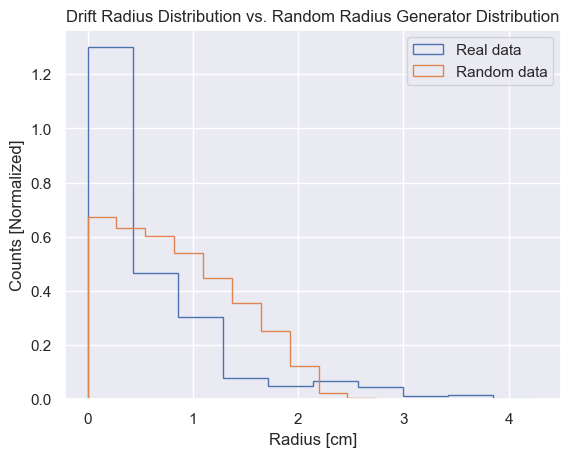

In [28]:
plt.figure()
plt.hist(ad.drift_df['Drift_radius'], density=True, histtype='step')
plt.hist(Rs, density=True, histtype='step')
plt.xlabel('Radius [cm]')
plt.ylabel('Counts [Normalized]')
plt.title('Drift Radius Distribution vs. Random Radius Generator Distribution')
plt.legend(['Real data', 'Random data'])
plt.show()

## Drift Model Comparisons?